In [ ]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/


In [ ]:
!kaggle datasets download -d rayhanzamzamy/non-and-biodegradable-waste-dataset

100% 1.86G/1.86G [01:39<00:00, 21.2MB/s]
100% 1.86G/1.86G [01:39<00:00, 20.1MB/s]


In [ ]:
import zipfile
zip_ref = zipfile.ZipFile('/content/non-and-biodegradable-waste-dataset.zip', 'r')
zip_ref.extractall('/content')
zip_ref.close()

In [ ]:
train_path = "/content/TRAIN.1"
test_path  = "/content/TEST"

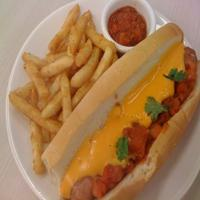

(200, 200, 3)

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import cv2
from google.colab.patches import cv2_imshow
img = cv2.imread("/content/TRAIN.1/B/TRAIN.1_BIODEG_ORI_100.jpg")
cv2_imshow(img)
img.shape




In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import cv2
from google.colab.patches import cv2_imshow

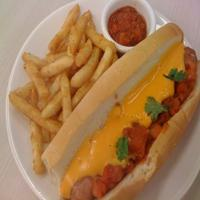

(200, 200, 3)

In [ ]:
img = cv2.imread("/content/TRAIN.1/B/TRAIN.1_BIODEG_ORI_100.jpg")
cv2_imshow(img)
img.shape

In [ ]:
from keras.models import Sequential
from keras.layers import Conv2D,MaxPooling2D,Activation,Dropout,Flatten,Dense

In [ ]:
model = Sequential()

model.add(Conv2D(128,kernel_size =(3,3),padding='valid',activation='relu',input_shape=(200,200,3)))


model.add(Conv2D(64,kernel_size =(3,3),padding='valid',activation='relu'))
model.add(MaxPooling2D(pool_size =(2,2),strides =2,padding='valid'))


model.add(Conv2D(32,kernel_size =(3,3),padding='valid',activation='relu'))
model.add(MaxPooling2D(pool_size =(2,2),strides =2,padding='valid'))




model.add(Flatten())

model.add(Dense(2000,activation='relu'))

model.add(Dense(1000,activation='relu'))

model.add(Dense(2,activation='sigmoid'))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 198, 198, 128)     3584      
                                                                 
 conv2d_1 (Conv2D)           (None, 196, 196, 64)      73792     
                                                                 
 max_pooling2d (MaxPooling2  (None, 98, 98, 64)        0         
 D)                                                              
                                                                 
 conv2d_2 (Conv2D)           (None, 96, 96, 32)        18464     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 48, 48, 32)        0         
 g2D)                                                            
                                                                 
 flatten (Flatten)           (None, 73728)             0

In [ ]:
model.compile(loss = "binary_crossentropy" ,optimizer = "SGD" ,metrics = ['accuracy'])
from keras.preprocessing.image import ImageDataGenerator
train_datagen = ImageDataGenerator(
                    rescale =1./255,
                    shear_range=0.3,
                    zoom_range=0.3,
                    horizontal_flip=True,
                    fill_mode='nearest'

)
test_datagen = ImageDataGenerator(
                    rescale =1./255,

)



train_generator = train_datagen.flow_from_directory(
    train_path,
    color_mode = 'rgb',

    batch_size=32,
    target_size=(200,200),
    class_mode='categorical',
    shuffle=True
)

test_generator = test_datagen.flow_from_directory(
    train_path,
    color_mode = 'rgb',

    batch_size=32,
    target_size=(200,200),
    class_mode='categorical',
    shuffle=True
)



Found 59922 images belonging to 2 classes.
Found 59922 images belonging to 2 classes.


In [ ]:


# Fit the model with EarlyStopping callback
history = model.fit(train_generator,
                    epochs=2,  # set a sufficiently large number of epochs
                    validation_data=test_generator,
              )


Epoch 1/2
1873/1873 [==============================] - 834s 445ms/step - loss: 0.3187 - accuracy: 0.8688 - val_loss: 0.2793 - val_accuracy: 0.8870
Epoch 2/2
1873/1873 [==============================] - 815s 435ms/step - loss: 0.2891 - accuracy: 0.8828 - val_loss: 0.2755 - val_accuracy: 0.8884


In [ ]:
import numpy as np
import pandas as pd
test_img = cv2.imread('/content/TRAIN.1/B/TRAIN.1_BIODEG_ORI_10000.jpg')
test_img = cv2.resize(test_img,(200,200))
test_input1 = test_img.reshape((1,200,200,3))
prediction = model.predict(test_input1)
pred_label = np.argmax(prediction)
print(pred_label)


1/1 [==============================] - 0s 381ms/step
1


In [ ]:
import os
folder = '/content/TRAIN.1'
sub_folder = [name for name in os.listdir(folder) if os.path.isdir(os.path.join(folder,name))]




In [ ]:
sub_folder[1]


'N'